# Hypothesis Testing
# Overview Exercises:

For each of the following questions: 
- Formulate a null and alternative hypothesis (be as specific as you can be)
- Then give an example of:
- What a true positive, True negative, Type I errors, Type II errors would look like. 

Probelm 1: Has the network latency gone up since we switched internet service providers?

- $H_{0}$ = Network latency or ping rate (milliseconds)(numeric) has not changed since the switch of service providers(boolean).
- $H_{α}$ = Network latency or ping rate (milliseconds)(numeric) has gone up since the switch of service providers(boolean).
- True Positive: 
- True Negative:
- Type I error:
- Type II error:

Problem 2: Is the website redesign any good?

- $H_{0}$ = 
- $H_{α}$ = 
- True Positive:
- True Negative:
- Type I error:
- Type II error:

Problem 3: Is our television ad driving more sales?

- $H_{0}$ = 
- $H_{α}$ = 
- True Positive:
- True Negative:
- Type I error:
- Type II error:

# T-test Exercises: 
# Problem 1:
- Ace Realty wants to determine whether the average time it takes to sell homes is different for its two offices. 
- A sample of 40 sales from office #1 revealed a mean of 90 days and a standard deviation of 15 days. 
- A sample of 50 sales from office #2 revealed a mean of 100 days and a standard deviation of 20 days. Use a .05 level of significance.

In [73]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import env
from pydataset import data

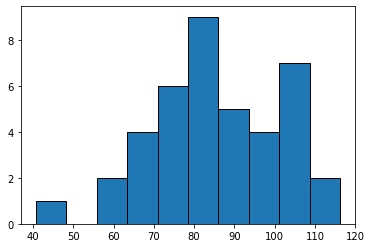

In [59]:
Off_1_observations = rows = 40
Off_1_μ = 90
Off_1_σ = 15
office_1 = pd.Series(stats.norm(90,15).rvs(40))

plt.hist(office_1,ec='black')
plt.show()

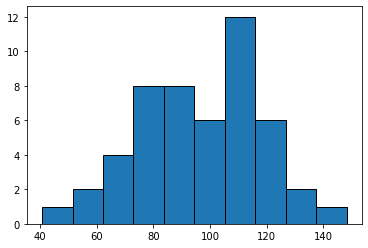

In [60]:
Off_2_observations = rows = 50
Off_2_μ = 100
Off_2_σ = 20
office_2 = pd.Series(stats.norm(100, 20).rvs(50))

plt.hist(office_2,ec='black')
plt.show()

$H_{0}$: Average time to sell a home did not change between two offices.

$H_{α}$: Average time did change between both offices. 

In [61]:
α = 0.05

In [62]:
# Verify assumptions
# At least 30 observations: Yes there are at least 30 observaitons in both sets
# Independent samples: Yes, they are both from different sets
# Equal variances: No, 

In [63]:
var_equal = office_1.var() ==  office_2.var()

In [64]:
tstat, pval = stats.ttest_ind_from_stats(90, 15, 40, 100, 20, 50, equal_var = var_equal)
f'P = {pval}, P/2 = {pval/2}, α = {α}, T = {tstat}' 

'P = 0.00811206270346016, P/2 = 0.00405603135173008, α = 0.05, T = -2.7091418459143854'

In [65]:
if (pval/2 < α) and (tstat > 0):
    print(f'We can reject H0')
else:
    print(f'We cannot reject H0')

We cannot reject H0


The Null Hypothesis cannot be rejected.

# Problem 2: 

Load the mpg dataset and use it to answer the following questions:

In [111]:
mpg = data('mpg')
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


Is there a difference in fuel-efficiency in cars from 2008 vs 1999?

In [116]:
## Creating two seperate dataframes for each year to compare.

In [112]:
mpg_2008 = mpg[mpg.year == 2008]
mpg_1999 = mpg[mpg.year == 1999]

In [117]:
# Plot

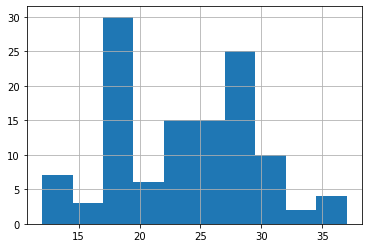

In [118]:
mpg_2008.hwy.hist()
plt.show()

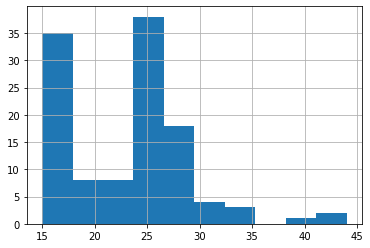

In [119]:
mpg_1999.hwy.hist()
plt.show()

In [120]:
## Hypothesis

- $H_{0}$ = There is no difference in fuel efficiency between 2008 and 1999 cars.
- $H_{1}$ = There is a difference in fuel efficiency between 2008 and 1999 cars.

In [121]:
## Alpha or Significance level
α = 0.05

In [125]:
##### Verify Assumption:
## Norm dist or at least 30?

least_30 = (len(mpg_2008) > 30) and (len(mpg_1999) > 30)
least_30

True

In [126]:
## Independent: Yes a vehicel cannot be made in two different years so far apart.

In [134]:
## Equal Variance?
l_tstat, l_p = stats.levene(mpg_2008.hwy ,mpg_1999.hwy)
var_equal = (l_p / 2 < 0.05) and (l_tstat > 0)
var_equal

False

In [137]:
## Compute tstat and pval
tstat, pval = stats.ttest_ind(mpg_2008.hwy, mpg_1999.hwy, equal_var = var_equal)
reject_hy = (p / 2 < α) and (tstat > 0)
reject_hy

False

In [ ]:
- decide

Are compact cars more fuel-efficient than the average car?

- plot
- hypothesis
- set alpha
- verify assumptions: norm dist or least 30, independent, equal var
- compute test stat and pval
- decide

Do manual cars get better gas mileage than automatic cars?

- plot
- hypothesis
- set alpha
- verify assumptions: norm dist or least 30, independent, equal var
- compute test stat and pval
- decide

# Correlation Exercises: 
Use the telco_churn data.

Problem 1: Does tenure correlate with monthly charges? 

Total charges? 

What happens if you control for phone and internet service?

Problem 2: Use the employees database.
Is there a relationship between how long an employee has been with the company and their salary?

Is there a relationship between how long an employee has been with the company and the number of titles they have had?

Problem 3: Use the sleepstudy data. Is there a relationship between days and reaction time?

# Chi Square Exercises:

Problem 1: Use the following contingency table to help answer the question of whether using a macbook and being a codeup student are independent of each other.

| | Codeup Student | Not Codeup Student |
| :- | :-: | :-: |
| Uses a Macbook | 49 | 20
| Doesn't Use A Macbook | 1 | 30 |

Problem 2: Choose another 2 categorical variables from the mpg dataset and perform a chi2 contingency table test with them. Be sure to state your null and alternative hypotheses.

Problem 3: Use the data from the employees database to answer these questions:
Is an employee's gender independent of whether an employee works in sales or marketing? (only look at current employees)

Is an employee's gender independent of whether or not they are or have been a manager

# More Exercises: 
Choose several continous and categorical variables that were not covered in the lesson and perform each type of test on them. You may use another data set if you wish.